# Combining Datasets: Concat and Append

Some of the most interesting studies of data come from combining different data sources.
These operations can involve anything from very straightforward concatenation of two different datasets, to more complicated database-style joins and merges that correctly handle any overlaps between the datasets.
``Series`` and ``DataFrame``s are built with this type of operation in mind, and Pandas includes functions and methods that make this sort of data wrangling fast and straightforward.

Here we'll take a look at simple concatenation of ``Series`` and ``DataFrame``s with the ``pd.concat`` function; later we'll dive into more sophisticated in-memory merges and joins implemented in Pandas.

We begin with the standard imports:

In [63]:
import numpy as np
import pandas as pd
df = pd.DataFrame([1,2,3,4],index = [1,3,2,4])
df.loc[1:3]

,0
1,1
3,2


In [64]:
df = pd.DataFrame([1,2,3])
df2 = df.copy()
pd.concat( [df, df2])
                  

,0
0,1
1,2
2,3
0,1
1,2
2,3


In [65]:
df1 = pd.DataFrame([[1,2,3,4], [4,3,2,1]], columns = ["A", "B", "C", "D"])
df2 = pd.DataFrame([[5,6,7,8]], columns = ["A", "B", "C", "D"])

In [66]:
df1

,A,B,C,D
0,1,2,3,4
1,4,3,2,1


In [67]:
df2

,A,B,C,D
0,5,6,7,8


In [68]:
pd.concat([df1, df2], axis = 0)
# axis=0: lo quiero añadir por filas, dejando los índices de las columnas sin modificar

,A,B,C,D
0,1,2,3,4
1,4,3,2,1
0,5,6,7,8


In [69]:
pd.concat([df1, df2],axis=1)
# axis=1: lo quiero añadir por columnas, dejando los índices de las filas sin modificar

,A,B,C,D,A,B,C,D
0,1,2,3,4,5.0,6.0,7.0,8.0
1,4,3,2,1,NaN,NaN,NaN,NaN


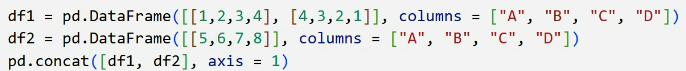

In [70]:
# podría haber hecho también, quitando un dato del df2 (el número 8) y la "D"

df1 = pd.DataFrame([[1,2,3,4], [4,3,2,1]], columns = ["A", "B", "C", "D"])
df2 = pd.DataFrame([[5,6,7]], columns = ["A", "B", "C"])
pd.concat([df1, df2], axis = 0)

,A,B,C,D
0,1,2,3,4.0
1,4,3,2,1.0
0,5,6,7,NaN


In [71]:
import pandas as pd
import numpy as np

For convenience, we'll define this function which creates a ``DataFrame`` of a particular form that will be useful below:

In [72]:
# este método es para pintar el dataframe bonito

def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In addition, we'll create a quick class that allows us to display multiple ``DataFrame``s side by side. The code makes use of the special ``_repr_html_`` method, which IPython uses to implement its rich object display:

In [73]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

In [74]:
eval("print('hola')")

# te paso un código de python y tú me lo evalúas

hola


In [75]:

df_nuevo = pd.concat([df1, df2],axis=1)
df_nuevo.index = ["a", "b"]
df_nuevo.columns = df_nuevo.columns.str.lower()
df_nuevo

,a,b,c,d,a,b,c
a,1,2,3,4,5.0,6.0,7.0
b,4,3,2,1,NaN,NaN,NaN


In [76]:
test = pd.DataFrame()
test['color'] = ["rojo", "verde", "azul", "rojo"]

test.color.str.upper()
#test


0     ROJO
1    VERDE
2     AZUL
3     ROJO
Name: color, dtype: object

The use of this will become clearer as we continue our discussion in the following section.

## Recall: Concatenation of NumPy Arrays

Concatenation of ``Series`` and ``DataFrame`` objects is very similar to concatenation of Numpy arrays, which can be done via the ``np.concatenate`` function as discussed in [The Basics of NumPy Arrays](02.02-The-Basics-Of-NumPy-Arrays.ipynb).
Recall that with it, you can combine the contents of two or more arrays into a single array:

In [77]:
np.concatenate([ [[1,2,3]]  ,   [[4,5,6]]    ]) # por defecto: axis = 0

array([[1, 2, 3],
       [4, 5, 6]])

In [78]:
np.concatenate([ [[1,2,3]]  ,   [[4,5,6]]    ] , axis = 1)

array([[1, 2, 3, 4, 5, 6]])

In [79]:
x = [1,2,3]
y = [4,5,6]
z= [7,8,9]
np.concatenate([    [x],[y],[z]    ], axis = 0)

# este es el concatenate de NUMPY: 'np.concatenate'

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [80]:
cubo = np.ones((3,3,3))
cubo

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [81]:
plano = np.zeros((3,3))
plano

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [82]:
cubo = np.ones((3,3,3))
plano = np.zeros((3,3))

np.concatenate([cubo, plano[np.newaxis,:]])

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [83]:
plano[np.newaxis, :].shape

(1, 3, 3)

In [84]:
cubo = np.ones((3,3,3))
plano = np.zeros((3,3))
plano[np.newaxis, :]


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [85]:
df = pd.DataFrame(np.zeros((3,3)))
df

,0,1,2
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0


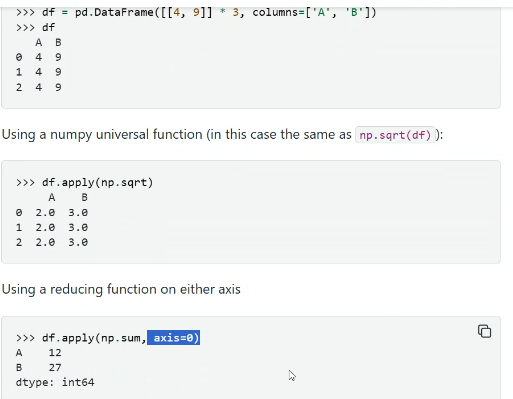

In [86]:
df.applymap(int) # applymap está OBSOLETO!!

C:\Users\AnaGu\AppData\Local\Temp\ipykernel_6484\1938106829.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(int) # applymap está OBSOLETO!!


,0,1,2
0,0,0,0
1,0,0,0
2,0,0,0


In [87]:
df = pd.DataFrame()
df["A"] = [1,2,3,4,5]
df["B"] = [11, 12, 13, 14, 15]
df

,A,B
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15


In [88]:
df['B'].apply(lambda x : x**2)

0    121
1    144
2    169
3    196
4    225
Name: B, dtype: int64

In [89]:
df.applymap(lambda x: x+2)

C:\Users\AnaGu\AppData\Local\Temp\ipykernel_6484\3559223735.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: x+2)


,A,B
0,3,13
1,4,14
2,5,15
3,6,16
4,7,17


In [90]:
df.A.map(lambda x: x+2)

0    3
1    4
2    5
3    6
4    7
Name: A, dtype: int64

In [91]:
df.A.apply(lambda x: x+2)

0    3
1    4
2    5
3    6
4    7
Name: A, dtype: int64

In [92]:
df["palabras"] = ["a","b","c","d","e"]
df

,A,B,palabras
0,1,11,a
1,2,12,b
2,3,13,c
3,4,14,d
4,5,15,e


In [93]:
# tengo que poner el "str" porque tengo que indicarle a dónde tengo que ir de pandas.series

df.palabras = df["palabras"].apply(str.upper)
df

,A,B,palabras
0,1,11,A
1,2,12,B
2,3,13,C
3,4,14,D
4,5,15,E


In [94]:
1+1

2

In [95]:
df2 = pd.DataFrame()
df2['A'] = [1,2,3,4,5]
df2['B'] = [6,7,8,9,10]
df2

,A,B
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


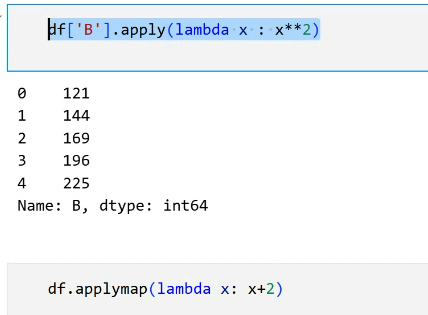

In [96]:
cosa =lambda x,y: x+y
cosa(2,3)

5

In [97]:
#df.apply(lambda x: x**2)
df2.apply(lambda x: x*1.)
df['A'] = df2.A.apply(lambda x: x*1.)

The first argument is a list or tuple of arrays to concatenate.
Additionally, it takes an ``axis`` keyword that allows you to specify the axis along which the result will be concatenated:

In [98]:
x = [[1,2],
     [3,4]]
np.concatenate([x,x], axis = 1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## Simple Concatenation with ``pd.concat``

Pandas has a function, ``pd.concat()``, which has a similar syntax to ``np.concatenate`` but contains a number of options that we'll discuss momentarily:

```python
# Signature in Pandas v0.18
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
```

``pd.concat()`` can be used for a simple concatenation of ``Series`` or ``DataFrame`` objects, just as ``np.concatenate()`` can be used for simple concatenations of arrays:

In [99]:
import numpy as np
import pandas as pd

In [100]:
s1 = pd.Series([11,22,33])
s2 = s1.copy()*5
pd.concat([s1,s2], verify_integrity= False)

# verify_integrity= True, va a intentar concatenar pero si hay índices duplicados, returna un error

0     11
1     22
2     33
0     55
1    110
2    165
dtype: int64

In [101]:
s1 = pd.Series([11,22,33])
s2 = s1.copy()
s3 = pd.concat([s1,s2]).reset_index(drop = True)
s3.drop_duplicates()

0    11
1    22
2    33
dtype: int64

In [102]:
s3

0    11
1    22
2    33
3    11
4    22
5    33
dtype: int64

In [103]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1,2,3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4,5,6])
pd.concat([ser1, ser2], axis = 0)


1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

It also works to concatenate higher-dimensional objects, such as ``DataFrame``s:

In [104]:
df1 = make_df('AB', [1,3])
df2 = make_df('AC', [3,4])
display('df1', 'df2', 'pd.concat([df1, df2], axis = 0, join = "inner")') 

# axis = 0, uno para abajo

df1
    A   B
1  A1  B1
3  A3  B3

df2
    A   C
3  A3  C3
4  A4  C4

pd.concat([df1, df2], axis = 0, join = "inner")
    A
1  A1
3  A3
3  A3
4  A4

In [105]:
df1 = make_df('AB', [1,3])
df2 = make_df('AC', [3,4])
display('df1', 'df2', 'pd.concat([df1, df2], axis = 1, join = "inner")')

# axis = 1, uno para la derecha

df1
    A   B
1  A1  B1
3  A3  B3

df2
    A   C
3  A3  C3
4  A4  C4

pd.concat([df1, df2], axis = 1, join = "inner")
    A   B   A   C
3  A3  B3  A3  C3

In [106]:
df1 = make_df('AB', [1,3])
df2 = make_df('AC', [3,4])
display('df1', 'df2', 'pd.concat([df1, df2], axis = 1, join = "outer")')

# axis = 1, uno para la derecha
# join = "outer", uno todo lo que tengo

df1
    A   B
1  A1  B1
3  A3  B3

df2
    A   C
3  A3  C3
4  A4  C4

pd.concat([df1, df2], axis = 1, join = "outer")
     A    B    A    C
1   A1   B1  NaN  NaN
3   A3   B3   A3   C3
4  NaN  NaN   A4   C4

In [107]:
df1 = make_df('AB', [1,3])
df2 = make_df('AC', [3,4])
display('df1', 'df2', 'pd.concat([df1, df2], axis = 0, join = "outer")')

# axis = 0, uno para abajo
# join = "outer", uno todo lo que tengo

df1
    A   B
1  A1  B1
3  A3  B3

df2
    A   C
3  A3  C3
4  A4  C4

pd.concat([df1, df2], axis = 0, join = "outer")
    A    B    C
1  A1   B1  NaN
3  A3   B3  NaN
3  A3  NaN   C3
4  A4  NaN   C4

In [108]:
df1 = make_df('AB', [1,2,3])
df2 = make_df('ABC', [3,4,5])
display('df1', 'df2', 'pd.concat([df1, df2], axis = 0)')

df1
    A   B
1  A1  B1
2  A2  B2
3  A3  B3

df2
    A   B   C
3  A3  B3  C3
4  A4  B4  C4
5  A5  B5  C5

pd.concat([df1, df2], axis = 0)
    A   B    C
1  A1  B1  NaN
2  A2  B2  NaN
3  A3  B3  NaN
3  A3  B3   C3
4  A4  B4   C4
5  A5  B5   C5

In [109]:
df_otro = df.copy()
df_otro.loc[1,"palabras"] = "A"
df_otro

,A,B,palabras
0,1.0,11,A
1,2.0,12,A
2,3.0,13,C
3,4.0,14,D
4,5.0,15,E


In [110]:
pd.concat([df, df_otro])

,A,B,palabras
0,1.0,11,A
1,2.0,12,B
2,3.0,13,C
3,4.0,14,D
4,5.0,15,E
0,1.0,11,A
1,2.0,12,A
2,3.0,13,C
3,4.0,14,D
4,5.0,15,E


By default, the concatenation takes place row-wise within the ``DataFrame`` (i.e., ``axis=0``).
Like ``np.concatenate``, ``pd.concat`` allows specification of an axis along which concatenation will take place.
Consider the following example:

In [111]:
df3 = make_df('AB', [0,1])
df4 = make_df('CD', [0,1])
display('df3', 'df4', "pd.concat([df3, df4], axis=0)")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis=0)
     A    B    C    D
0   A0   B0  NaN  NaN
1   A1   B1  NaN  NaN
0  NaN  NaN   C0   D0
1  NaN  NaN   C1   D1

We could have equivalently specified ``axis=1``; here we've used the more intuitive ``axis='col'``. 

### Duplicate indices

One important difference between ``np.concatenate`` and ``pd.concat`` is that Pandas concatenation *preserves indices*, even if the result will have duplicate indices!
Consider this simple example:

In [112]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


Notice the repeated indices in the result.
While this is valid within ``DataFrame``s, the outcome is often undesirable.
``pd.concat()`` gives us a few ways to handle it.

#### Catching the repeats as an error

If you'd like to simply verify that the indices in the result of ``pd.concat()`` do not overlap, you can specify the ``verify_integrity`` flag.
With this set to True, the concatenation will raise an exception if there are duplicate indices.
Here is an example, where for clarity we'll catch and print the error message:

In [113]:
try:
    pd.concat([x,y], verify_integrity=True)
except ValueError as e:
        print("ValueError:", e)

ValueError: Indexes have overlapping values: Index([0, 1], dtype='int64')


#### Ignoring the index

Sometimes the index itself does not matter, and you would prefer it to simply be ignored.
This option can be specified using the ``ignore_index`` flag.
With this set to true, the concatenation will create a new integer index for the resulting ``Series``:

In [114]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

# ignore_index=True, para que resetee los índices

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


#### Adding MultiIndex keys

Another option is to use the ``keys`` option to specify a label for the data sources; the result will be a hierarchically indexed series containing the data:

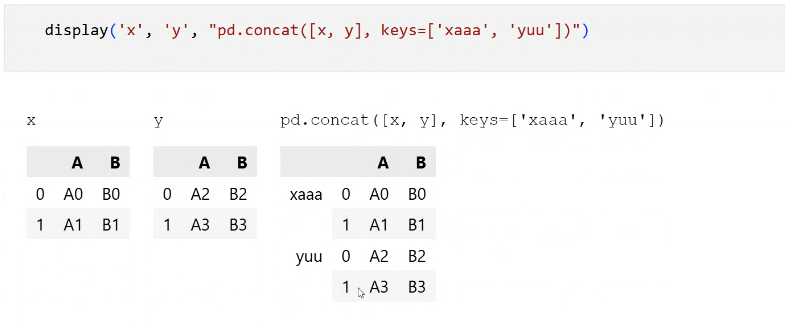

In [115]:
display('x', 'y', "pd.concat([x, y], keys=['multi-indice-1', 'multi-indice-2'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['multi-indice-1', 'multi-indice-2'])
                   A   B
multi-indice-1 0  A0  B0
               1  A1  B1
multi-indice-2 0  A2  B2
               1  A3  B3

The result is a multiply indexed ``DataFrame``, and we can use the tools discussed in [Hierarchical Indexing](03.05-Hierarchical-Indexing.ipynb) to transform this data into the representation we're interested in.

### Concatenation with joins

In the simple examples we just looked at, we were mainly concatenating ``DataFrame``s with shared column names.
In practice, data from different sources might have different sets of column names, and ``pd.concat`` offers several options in this case.
Consider the concatenation of the following two ``DataFrame``s, which have some (but not all!) columns in common:

In [41]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

By default, the entries for which no data is available are filled with NA values.
To change this, we can specify one of several options for the ``join`` and ``join_axes`` parameters of the concatenate function.
By default, the join is a union of the input columns (``join='outer'``), but we can change this to an intersection of the columns using ``join='inner'``:

In [42]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

The combination of options of the ``pd.concat`` function allows a wide range of possible behaviors when joining two datasets; keep these in mind as you use these tools for your own data.